# Ford GoBike Activity Pattern and Effects of Trip Characteristics on Trip Duration
## by Wei Chong Ong

## Investigation Overview

I investigated Bay Wheels (Ford GoBike) public datasets, focusing on analyzing the bike activity patterns and the effects of trip characteristics on the average trip duration.

## Dataset Overview

The dataset includes information about individual rides made in a bike-sharing system covering three Californa's cities, San Francisco, San Jose and Oakland, for a seven months period, from April 2020 until October 2020. The data consist of the location of the stations, the time the users pick up and return the bike, user type and what type of bike they use for the trip. There are approximately 1 million data points. 1057 data points were removed from the analysis due to inconsistencies or missing information.

## Topics
I created visualizations and communicated the findings for the following topics:
1. When are most trips taken in terms of time of day or day of the week?
2. How long does the average trip take?
3. Does the average trip duration depend on 
    - if a user is a subscriber (member) or customer (casual)?
    - if the bike used is a electric bike or a docked bike?
    - the time period a user picks up the bike?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bay_wheels_master = pd.read_csv('bay_wheels_master.csv')

## Distribution of Trip Duration

Trip duration in the dataset has a very large range of values, from about 0.017 min at the lowest, to about more than 50000 mins at the highest, which is more than a month. In order to show the distribution with very large range, I plotted it on a logarithmic scale. The distribution of durations takes on a unimodal shape. From this distribution we can clearly see that the **average trip duration** is about **12.7 mins**.

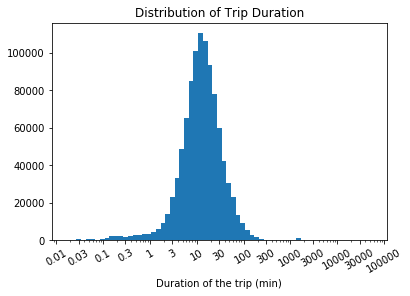

In [3]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1.77, 4.7+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data = bay_wheels_master, x = 'duration', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels, rotation = 30)
plt.xlabel('Duration of the trip (min)')
plt.title('Distribution of Trip Duration');

## Pickup and Return Hours

Since majority of the users return the bike within 60 mins, the pickup and return hour show similar pattern. This pattern surprised me as I would expect there would be two peaks, start-work time and off-work time. However, we could clearly see that there is only one peak during the off-work period. The number of rides increases gradually from 5am until the evening with the peak at 5pm. By comparing the number of pickups and returns throughout the day, visible are that people are picking up the bike more in the moring and returning the bike more in the everning.

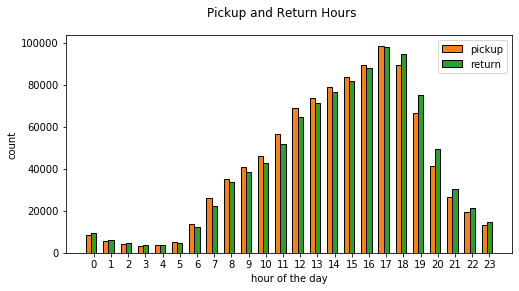

In [4]:
pickup_hour = bay_wheels_master.groupby('pickup_hour').count()['ride_id']
return_hour = bay_wheels_master.groupby('return_hour').count()['ride_id']

fig, ax = plt.subplots(figsize=(8,4))
ind = np.arange(24)
width = 0.3
bars1 = ax.bar(ind, pickup_hour, width, color = sns.color_palette()[1], edgecolor = 'black', label='pickup')
bars2 = ax.bar(ind + width, return_hour, width, color = sns.color_palette()[2], edgecolor = 'black', label='return')
ax.set_ylabel('count')
ax.set_xlabel('hour of the day')
locations = ind + width
labels = ['{}'.format(v) for v in ind]
ax.set_xticks(locations)
ax.set_xticklabels(labels)
ax.legend()
fig.suptitle('Pickup and Return Hours')
plt.show()

## Pickup and Return Hours by Week Period

On the weekdays, the peak is at around 5pm to 6pm and this is the off-work time for most of the people. The presumable explanation is that majority of the the users are using shared bike as a transportation to go home from work. On the other hand, most of the trips are from 1pm to 3pm on the weekends, which is not the same as the overall hourly pattern.

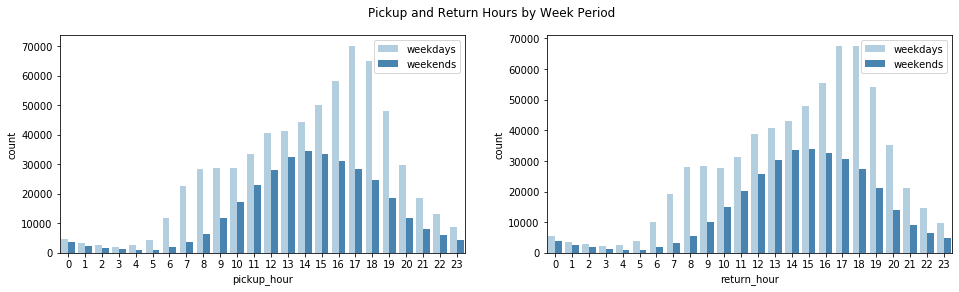

In [5]:
fig = plt.figure(figsize = [16, 4])

ax = plt.subplot(1, 2, 1)
sns.countplot(data = bay_wheels_master, x = 'pickup_hour', hue = 'week_period', palette = 'Blues')
ax.legend()

ax = plt.subplot(1, 2, 2)
sns.countplot(data = bay_wheels_master, x = 'return_hour', hue = 'week_period', palette = 'Blues')
ax.legend()
fig.suptitle('Pickup and Return Hours by Week Period')
plt.show()

## Average Trip Duration vs. Hour of the Day

We saw in the previous investigation that the average trip duration is about 12.7 mins. Interestingly, this plot shows that the average trip duration depends on the time the users pick up the bike. Users tend to spend longer time on the trip than average if they pick up the bike in the afternoon, between 1pm to 3pm.

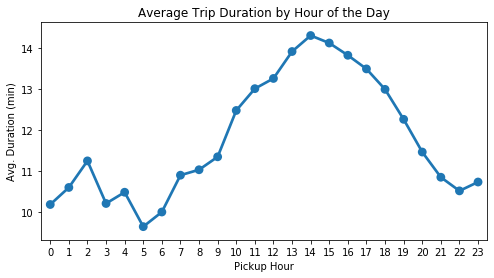

In [6]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [8, 4])
ax = sns.pointplot(data = bay_wheels_master, x = 'pickup_hour', y = 'duration', ci=None, estimator = np.median, color = base_color)
ax.set_xlabel('Pickup Hour')
ax.set_ylabel('Avg. Duration (min)')
ax.set_title('Average Trip Duration by Hour of the Day')
plt.show()

## Average Trip Duration vs. User Type, Bike Type and Week Period

I created a categorical plot to explore the relationship between the one numeric variable `duration` and three categorical variables `rideable_type`, `week_period` and `member_casual`, as it would give me more insights about the interaction effect between these variables.

We can see that all the dark blue bars are taller than its adjacent light blue bar, which means that generally users have in average longer trip duration on the weekends. Regarding the comparison of user type, casual users have a longer trip compared to member users in average, and they use electric bikes generally for a shorter distance trip, whereas they prefer docked bike for a longer distance trip. Interestingly, the duration of the trips taken with electric and docked bike by the member users are very similar. The difference in duration between weekdays and weekends for each type of bike is not significant either.

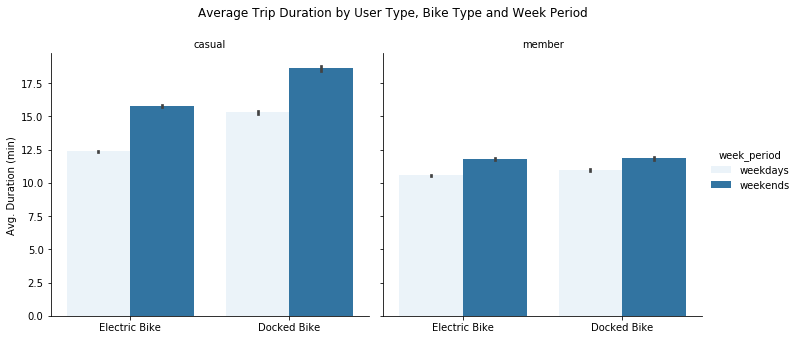

In [7]:
g = sns.catplot(x='rideable_type', y='duration',
                hue="week_period", col='member_casual',
                data=bay_wheels_master, kind="bar", estimator=np.median, color = base_color)
(g.set_axis_labels('', 'Avg. Duration (min)')
  .set_titles("{col_name}")
  .set_xticklabels(['Electric Bike', 'Docked Bike']))
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Average Trip Duration by User Type, Bike Type and Week Period')
plt.show()